# Центральная предельная теорема своими руками - Экспоненциальное распределение (lambda * e)**(-lambda * x)

https://ru.wikipedia.org/wiki/Экспоненциальное_распределение

Text(0.5,0,u'x')

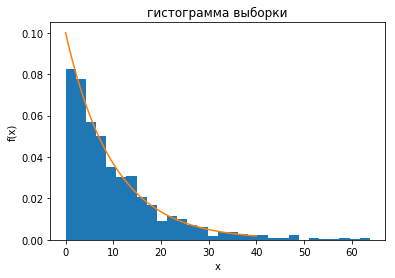

In [85]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon, norm
%matplotlib inline

e_lambda = 0.1
e_scale = 1./e_lambda # параметр для scipy.stats.expon

x = np.linspace(0, 40, 100)
w = expon.pdf(x, scale=e_scale) # теоретическая плотность распределения
sample = expon.rvs(size=1000, scale=e_scale) # выборка размера 1000

plt.title(u'гистограмма выборки')

plt.hist(sample, bins=30, normed=True)
plt.plot(x, w, label='theoretical pdf')

plt.ylabel('f(x)')
plt.xlabel('x')




## Оценка распределения выборочного среднего при разных объемах выборок

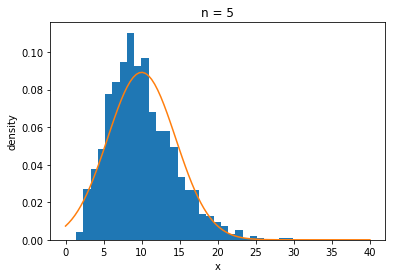

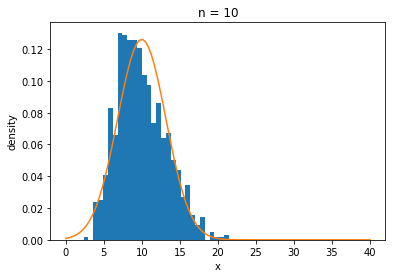

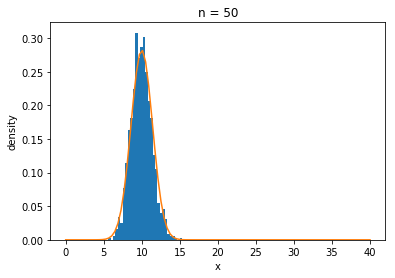

In [89]:
# дисперсия (из википедии)
disp = e_lambda**(-2.)

# среднеквадратическое отклонение (не нужно, но пусть тут побудет)
st_dev = disp**(0.5)

# математическое ожидание
math_exp = e_lambda**(-1)

sample_count = 1000 # количество выборок
bins_count = 30 # количество столбцов диаграммы

numbers = [5, 10, 50] # массив объемов выборок
figure = 1

# для каждого объема выборок n
for n in numbers:
    i = 0
    
    # заполняем массив m средними значениями выборок (1000 раз)
    m = []
    while i < sample_count:
        sample = expon.rvs(size=n, scale=e_scale)
        m.append(sample.mean()) # sample.mean() - среднее для выборки
        i = i + 1

    # из ЦПТ следует, что дисперсия нормального распределения равна дисперсии распределения, деленная на объем выборки (n)
    # вычисляем дисперсию и стандартное отклонение для нормального распределения, которым приближается распределение средних
    norm_disp = disp/float(n)
    norm_st_dev = norm_disp**(0.5)
    
    norm_v = norm.pdf(x, loc=math_exp, scale=norm_st_dev) # значения нормального распределения

    plt.figure(figure)
    plt.title('n = '+str(n))
    plt.hist(m, bins=bins_count, normed=True)
    plt.plot(x, norm_v)
    
    plt.ylabel('density')
    plt.xlabel('x')
    
    figure = figure + 1



## Выводы

Из графиков видно, что при увеличении объемов выборок, увеличивается точность аппроксимации распределения выборочных средних нормальным распределением